<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/hungarian/machine_learning/lessons/yolo_cv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Példa a YOLO5 modell használatára saját Python kódból

Telepítsük a *ultralytics* modult, hogy a már betanított YOLO modellt használhassuk.

In [1]:
!pip -q install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.1/755.1 kB 15.4 MB/s eta 0:00:00


In [4]:
from matplotlib import pyplot as plt
import cv2
from ultralytics import YOLO

Töltsük be a YOLO5 modell súlyait.

In [5]:
model = YOLO("yolo-Weights/yolov5n.pt")

PRO TIP 💡 Replace 'model=yolo-Weights/yolov5n.pt' with new 'model=yolo-Weights/yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 5.27M/5.27M [00:00<00:00, 330MB/s]


Az alábbi nyolcvan objektum fajta detektálására tanították be a modellt.

In [6]:
classNames = model.names
classNames

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

Töltsünk le egy képet!

In [7]:
!wget -q http://gita.hu/keptar/gita2022/IMG_7802.JPG

Alkalmazzuk a modellt a képre! A megtalált objektumok befoglaló téglalapja és neve mellett a találat vaószínűségét is megkapjuk.


0: 448x640 8 persons, 12 wine glasss, 2 cups, 1 chair, 1 dining table, 11.0ms
Speed: 4.8ms preprocess, 11.0ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)
  90, 715,  179, 943: wine glass 88.0%
 204, 363,  583, 765: person 82.3%
 669, 402,  984, 788: person 80.4%
 242, 681,  312, 845: wine glass 79.7%
   9, 328,  170, 479: person 77.5%
 969, 420, 1296, 917: person 76.8%
 139, 337,  339, 632: person 66.4%
  25, 633, 1357, 990: dining table 61.7%
 743, 693,  814, 894: wine glass 60.1%
 818, 654,  878, 817: wine glass 60.1%
 308, 321,  426, 488: person 57.1%
 660, 631,  701, 809: wine glass 51.6%
1072, 735, 1129, 895: wine glass 50.5%
1381, 820, 1499, 997: person 47.2%
 304, 667,  385, 827: wine glass 41.9%
   0, 794,   77, 998: wine glass 41.7%
 795, 642,  879, 897: wine glass 38.2%
1135, 886, 1198, 997: cup 35.7%
1084, 885, 1197, 996: cup 33.3%
   0, 467,   55, 586: wine glass 32.6%
   0, 592,   54, 756: person 32.3%
 630, 315,  755, 586: chair 28.1%
   0, 468,   30

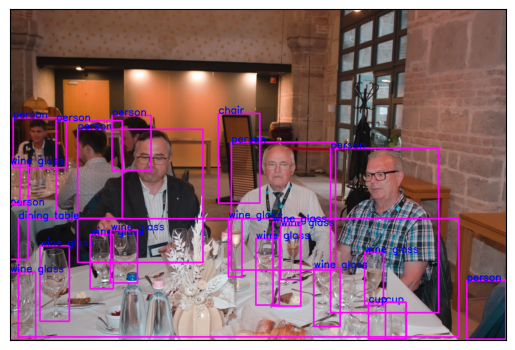

In [11]:
img = cv2.imread('IMG_7802.JPG')
for r in model(img):
    for box in r.boxes:
        x1, y1, x2, y2 = box.xyxy[0]        # bounding box
        print(f"{int(x1):4d}, {int(y1):3d}, {int(x2):4d}, {int(y2):3d}: {classNames[int(box.cls[0])]} {box.conf[0]:.1%}")
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 255), 3)
        cv2.putText(img, classNames[int(box.cls[0])], (int(x1), int(y1)),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

A *yol.py* program a GitHub oldalon egy a webkamerából érkező képek feldolgozását valósítja meg, melyet a saját gépén futtathat.